In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools

In [2]:
pid = 'tani'

In [3]:
origin_data = pd.read_csv('result/' + pid + '_MItask.csv')
origin_data = origin_data.drop(origin_data.index[0])
data = origin_data.groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).mean()

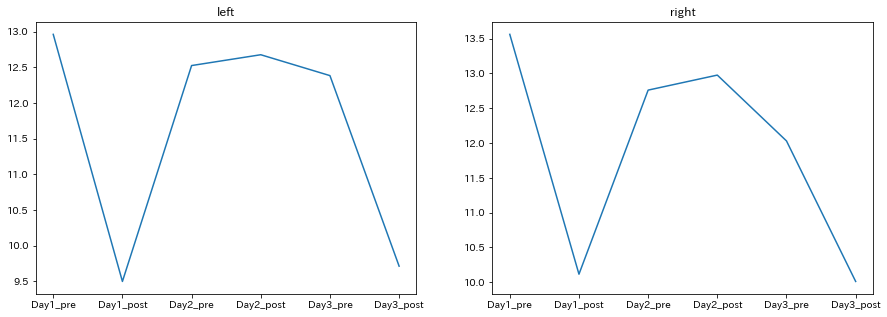

In [4]:
MI_Xaxis = ['Day1_pre', 'Day1_post', 'Day2_pre', 'Day2_post', 'Day3_pre', 'Day3_post']
plt.figure(figsize=(15, 5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    plt.plot(MI_Xaxis, data[data.hand == hand].RT)
    plt.title(hand)

In [5]:
PT_data = pd.read_csv('result/' + pid + '_PT.csv')

In [6]:
PT_df = PT_data.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()

In [7]:
MC_df = pd.concat([data[(data.day == 'Day1') & (data.timing == 'pre')], data[(data.day == 'Day3') & (data.timing == 'post')]])

In [8]:
MC_df['PT'] = PT_df['PTime'].values.tolist()

In [9]:
MC_df.reset_index()

,index,pid,condition,day,timing,hand,Unnamed: 0,block,RT,PT
0,0,tani,continuous,Day1,pre,right,4.80,2.0,13.560239,18.155197
1,1,tani,continuous,Day1,pre,left,5.25,2.5,12.962780,14.263131
2,10,tani,continuous,Day3,post,right,4.20,2.0,10.011920,9.547842
3,11,tani,continuous,Day3,post,left,4.80,2.0,9.712270,10.225714


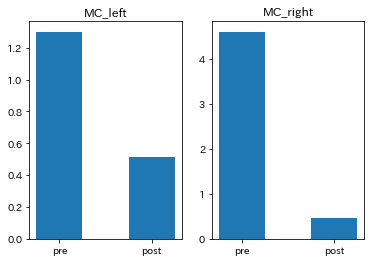

In [10]:
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    plt.bar(['pre', 'post'], abs(MC_df[MC_df.hand == hand].RT - MC_df[MC_df.hand == hand].PT), width=0.5)
    plt.title('MC_' + hand)